In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
from pylab import rcParams
import platform

import re
import os

Import compiled T values from spreadsheet. Add log10 of T and group by aquifer.


In [2]:
spreadsheet_location = "U:/GWP/Ogden Valley/well logs/transmissivity/Transmissivity.xlsx"
T_all = pd.read_excel(spreadsheet_location,"All")
T_all['log_T'] = T_all['trans'].apply(lambda x: np.log10(x),1)
T_main = T_all[T_all.Aquifer.isin(['Prin','PrinConf','KTcgA','TvC','ZsiC'])]
T_stats = T_main.groupby(['Aquifer'])['trans','log_T'].agg({'mean': np.mean,'median':np.median,
                                                  'min':np.min,'max':np.max,'count':np.count_nonzero})
geomean = T_stats['mean']['log_T']**10

In [3]:
T_stats

count                   max                 min            \
          trans  log_T          trans     log_T     trans     log_T   
Aquifer                                                               
KTcgA      37.0   37.0    2596.553586  3.414397  5.150827  0.711877   
Prin      165.0  165.0  104046.931820  5.017229  3.691245  0.567173   
PrinConf   53.0   53.0   14766.377654  4.169274  3.121457  0.494357   
TvC        19.0   19.0    3089.854916  3.489938  1.439092  0.158089   
ZsiC       15.0   15.0    3073.241931  3.487597  5.023789  0.701031   

              median                   mean            
               trans     log_T        trans     log_T  
Aquifer                                                
KTcgA      26.351409  1.420804   143.120783  1.548011  
Prin      167.157497  2.223126  1115.930872  2.200912  
PrinConf  248.142961  2.394702  1018.442587  2.339549  
TvC       219.813440  2.342054   355.366364  2.031687  
ZsiC       97.792121  1.990304   661.556579  2.119422

In [4]:
T_stats.to_clipboard()

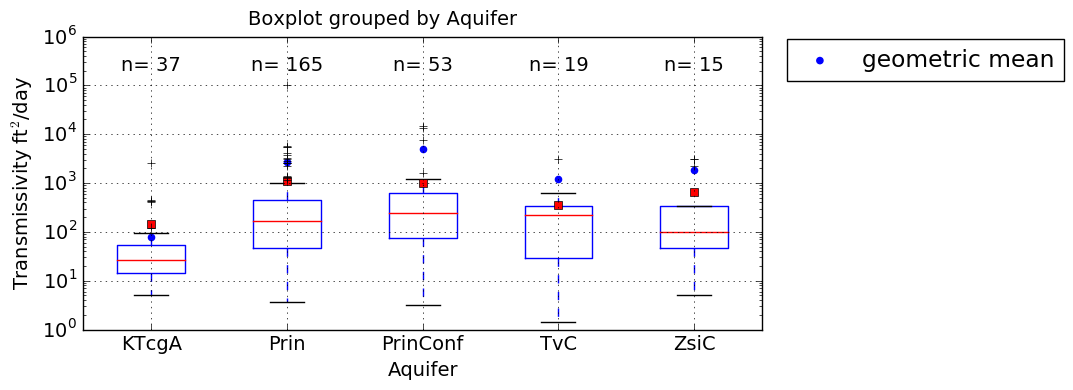

In [26]:
rcParams['pdf.fonttype']=42
rcParams['font.size'] =14
rcParams['figure.figsize'] = 8, 4

T_main.boxplot(by = 'Aquifer', column='trans',showmeans=True)
plt.yscale('log',basey=10)
for j in range(len(T_stats)):
    plt.text(j+1,200000,'n= ' + str(int(T_stats['count']['trans'][j])),
             horizontalalignment='center')

#plt.xticks(range(1,len(geomean)+1),[])
plt.scatter(range(1,len(geomean)+1),geomean.values,color='blue',
            marker='o',label='geometric mean')
plt.legend(scatterpoints=1,bbox_to_anchor=(1.02,1.03), loc="upper left")

plt.ylabel(r'Transmissivity ft$^2$/day')
plt.title('')
plt.tight_layout()

plt.savefig("U:/GWP/Ogden Valley/well logs/transmissivity/Transmissivity_boxplot.pdf")
